# Probability Density Functions
So far we have looked at discrete random variables and how to calculate/visualize their distribution functions. In this lesson, we shall deal with continuous variables and probability density function (pdf) as a way to model the probability of occurrence for such variables.

## Objectives
Students would be able to :
* Understand the use of calculating PDFs for real valued random variables
* Differentiate between probability and probability densities
* Understand Kernel Density Estimation plots for PDFs


## Continuous Variables:

Continuous variables can take any real values. Think of it like this: If that number in the variable can keep counting, then its most probably a continuous variable.

### Example:

Let's say that the height of a person is 6.1 feet and thats where we normally stop. Or lets say we want to get a bit more accurate and call it 6.15 feet. 

But in reality the height could actually be ..

6.1520436512094802388472039874222 ………………………………………………… Feet. 

The dots show that the calculation can be ongoing infinitely based on what measures and equipment we use for calculating height. This is what we meant by  “keep counting”. 

<img src = "height.jpg" width= 200>

> We can not identify the exact value of a continuous variable

So height , weight, blood pressure  etc. and such other values would be categorized as continuous variable.

### Probability vs. Probability Density 

Continuous variables can take on an infinite number of variables. For example, you could have a random variable Y that represents possible heights for a number of individuals in a survey group can be shown as given below:
<img src="pdf1.png" width = 300>

Looking at above histogram we can see that most of the values lie around the mean (around 67 inches). As we move away from the mean on both directions, the frequency of observations reduce creating two tails at both ends. The red line above shows a probability "**Density**" function, as compared to Probability functions we saw with cdf and pmf. A Probability Density Function (pdf) helps identify the regions in the distribution where observations are more likely to occur i.e. it is more dense. So for the distribution above, the mean region has a high probability density as compared to tails which is reflected on y -axis. This is an example of a **Normal Distribution** which we shall look at next. 

>The probability density function(also called a probability distribution function) shown above shows all possible values for height, which for this case, has an infinite amount of possibilities. 

We can use probability density functions to answer a question like:
What is the probability that a person's height is between 60  and 70  inches? 
Written in notation, the question becomes:

> **P( 60 < Height < 70 )**

### Interpreting pdf

Probability functions are great for figuring out **intervals** because as shown above, it is hard to identify an exact point. A height of 6 feet (72 inches) is actually considered interval between say 5.99 feet and 6.01 feet which makes it an interval for dealing with this continuous variable. So we have to be careful when reading probability density functions, especially when it comes to exact numbers. For heights, What about the probability any person will weigh exactly 6 feet? Written in notation, the question would be:

> **P( Height = 72 )**

Looking at the graph, you might think that the probability of a person having height of exactly six feet it 0.05 or 5%, but this not accurate. The idea that 5% of people are **exactly** 6 ft tall is just not conceivable. Heights would differ in terms of millimeters, micrometers or even nanometers. The person could be 6.00012 or 5.99987 feet tall. In fact, the probability of someone being exactly 6ft is so tiny. it’s practically **zero**. So we need to define an interval to capture the value. If we set our interval as heights between say 71.99 and 72.01 inches, we can write this as:

> **P( 71.99 < Height < 72.01 )**

And now we can say based on given data, this probability interval captures 5% of the population. The width of such an interval can be set according to nature of data under observation and also level of accuracy required. 

### The Area Under Curve

Another way to look at this is that if you drew the “area” for a question like this, it would actually just be a line. And a line has zero area. So we need to measure intervals for continuous variables as shown below:

![](pdf2.jpg)



The formal mathematical representation for calculating a area under curve is shown below:
![](formula.jpg)
> **pdf is the probability function F(x), such that x falls between two values (a and b), is equals to the integral (area under the curve) from a to b**

We shall look at this in detail when talking about normal distributions. 

### Visualizing probability Density Functions

pdfs can be visualized using hitograms and kde (kernel density estimation) plots. We have had quite a bit of practice on histograms. We shall now look at how to plot a histogram and kde for a continuous variable in python. We shall use a dataset called Weight and Height dataset containing 10,000 observations about the heights and weights of individuals , grouped as male an female. Let's load the dataset in our python environment.

In [30]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd 
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Great, lets first build a histogram for Height attribute. Remember for calculating probabilities we used normalization when drawing pmf an cdf. Now that we know how to do this, we can employ some of matplotlib's built in capabilities by using the matplotlib `hist()` function and passing parameter `normed=True` to it. That will automatically normalize a frequency based histogram to act like probability function. We shall set the number of bins = 20 to start with. Let's see this action:

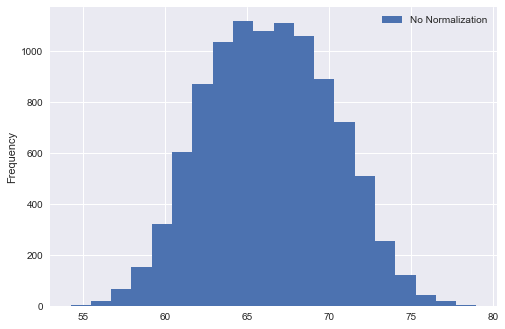

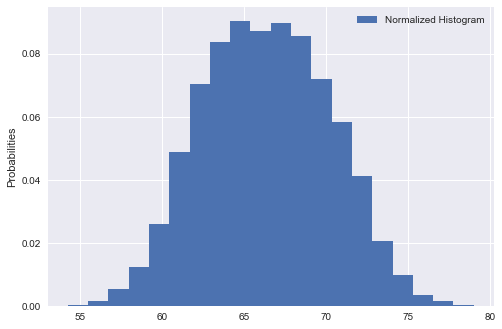

In [67]:
data.Height.plot.hist(bins = 20, normed=False, label = 'No Normalization')
plt.legend()
plt.show()
data.Height.plot.hist(bins = 20, normed=True, label = 'Normalized Histogram')
plt.ylabel ('Probabilities')

plt.legend()

Great , this looks like data well centred around the mean (normallly distributed). Also, we can see that frequencies from first histogram have been converted into probabilities using the `normed` argument. 

#### How about visualizing the density function 

So a density curve would be a line, as we saw with height pdf above. There are number of ways to do that. Let's calculate the actual values which are used to plot the histogram above in numpy and try to draw a line "at the peaks of histogram bars" using simple interpolation. 

We can use the `np.histogram` function to calculate histogram values as shown above and interpolate between these values to plot a density curve. 

In [62]:
n, bins = np.histogram(x, 20, density=1)
n , bins

(array([0.00040428, 0.00145539, 0.00533644, 0.01228997, 0.02603534,
        0.04883648, 0.07034393, 0.08376588, 0.09031514, 0.08724265,
        0.08958744, 0.08562554, 0.07204189, 0.05829652, 0.0412361 ,
        0.02061805, 0.00970261, 0.00347677, 0.00153625, 0.00040428]),
 array([54.26313333, 55.49991378, 56.73669423, 57.97347468, 59.21025513,
        60.44703558, 61.68381603, 62.92059648, 64.15737693, 65.39415738,
        66.63093784, 67.86771829, 69.10449874, 70.34127919, 71.57805964,
        72.81484009, 74.05162054, 75.28840099, 76.52518144, 77.7619619 ,
        78.99874235]))

### Interpolation
Here `n` are the values of histogram and `bins` are the edges of the bins. We can interpolate between these values to calculate the points for density curve as shown below. 

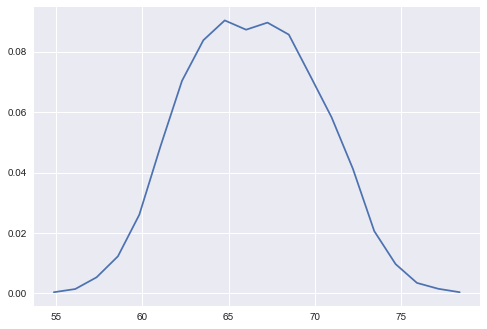

In [63]:
# Initialize numpy arrays with zeros to store interpolated values
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

# plot the calculated curve
plt.plot(pdfx, pdfy)


There we have it. This plot reflects our density function. We can plot it on top of our normalized histogram now and get a complete picture of underlying data. 

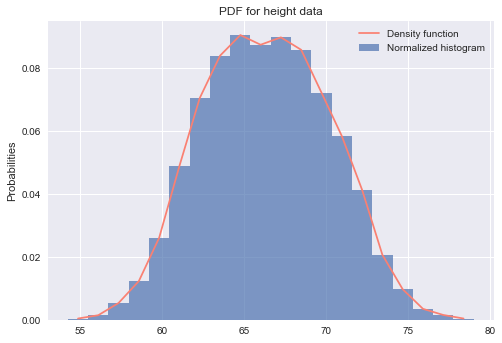

In [66]:
data.Height.plot.hist(bins = 20, normed=True, label = 'Normalized histogram', alpha = 0.7)
# plot the calculated curve
plt.plot(pdfx, pdfy, color = 'salmon', label = 'Density function')
plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()

So here it is. Our normalized histogram with a probability density curve. We shall move to a lab and exercise a bit more on these ideas next to analyze this dataset. 


## Summary
In this lesson we looked at the probability density function and identified the difference between point probabilities that we saw with categorical variables, to probability density functions for continuous variables. We shall further explore these ideas in proceeding lessons. 